In [2]:
import numpy as np
from numpy.random import binomial
from scipy.stats import binom
from math import factorial
import matplotlib.pyplot as plt

## Secuencias de eventos tipo Bernoulli

$$
P(k, n; p) = {n \choose k} p^k (1-p)^{n-k} = \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k}
$$

In [5]:
def my_binomial(k,n,p):
  return (factorial(n)/(factorial(k)*factorial(n-k)))*pow(p,k)*pow(1-p,n-k)
  


# quiero calcular binomial para 2 caras de 3 lanzamientos de una moneda  con una probabilidad equilibrada de 0.5 para cada cara

ver link notas idroo 
https://app.idroo.com/boards/nTq0YY2RFR 


en el ejemplo descrito en idroo en seccion 5 distribuciones discretas nos daba 3/8

In [6]:
my_binomial(2,3,0.5)

0.375

In [7]:
3/8

0.375

#  existe otra manera de implementar esto usando scipy con binom





In [8]:
dist=binom(3,0.5)
dist.pmf(2)

0.3750000000000001

## Validación del ejercicio hecho a mano

$$
P(k\leq 2, n=3, p=1/2) = \sum_{k=0}^2 \left[ \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k} \right] = \frac{7}{8}
$$

# binom para calcular distribucion acumulada

cdf cumulative density function

para calcular la probabilidad de obtener 2 o menos caras  k<=2

In [9]:
dist.cdf(2)

0.875

In [10]:
7/8

0.875

## Simulaciones de secuencias con generadores aleatorios

* Los generadores aleatorios tienen como propósito simular muestras de datos que resultarían de muestreos en la vida real de procesos aleatorios como lanzar una moneda o un dado.

In [13]:
# simulación con 100 lanzamientos de moneda equilibrada
# (ejecuta esta celda varias veces para observar la variación en los resultados)
p=0.5
n=3
binomial(n, p)

2

el resultado anterior dice que de tres lanzamientos aleatorios tal numero dio en cara

es lanzar virtualmente monedas 

# voy a lanzar muchas veces esta moneda y lo voy a guardar en un array de pyton


In [14]:
arr=[]

for _ in range(100):
  arr.append(binomial(n,p))
  

In [15]:
arr

[3,
 0,
 2,
 3,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 3,
 2,
 1,
 2,
 1,
 0,
 2,
 2,
 2,
 3,
 2,
 2,
 0,
 0,
 3,
 0,
 1,
 1,
 1,
 1,
 3,
 0,
 1,
 1,
 2,
 1,
 2,
 3,
 1,
 1,
 2,
 1,
 1,
 3,
 3,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 3,
 1,
 0,
 0,
 2,
 0,
 1,
 2,
 1,
 1,
 2,
 1,
 0,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 0]

# ahora quiero dibujar los resultados

ver link notas idroo 
https://app.idroo.com/boards/nTq0YY2RFR 
 


sabemos que los resultados posibles de lanzar 3 monedas son  
0,1,2,3

In [ ]:
# num_trials = numero de intentos
def plot_hist(num_trials):
  values = [0,1,2,3]
  arr=[]
  for _ in range(num_trials):
    arr.append(binomial(n,p))
  
  



# necesitamos calcular el numero de veces que aparece un numero en mi lista

In [16]:
np.unique(arr,return_counts=True)

(array([0, 1, 2, 3]), array([13, 37, 38, 12]))

tomo la lista 2 que corresponde al numero 1

In [17]:
np.unique(arr,return_counts=True)[1]

array([13, 37, 38, 12])

# lo divido por todos los eventos posibles que es dividir por la longitud del arreglo

In [18]:
np.unique(arr,return_counts=True)[1]/len(arr)

array([0.13, 0.37, 0.38, 0.12])

In [ ]:
# num_trials = numero de intentos
def plot_hist(num_trials):
  values = [0,1,2,3]
  arr=[]
  for _ in range(num_trials):
    arr.append(binomial(n,p))
  sim =np.unique(arr,return_counts=True)[1]/len(arr)
  

# ahora voy a obtener la distribucion teorica

pues resulta que la distribucion teorica es coger la binom

In [21]:
values = [0,1,2,3]
teorica=[binom(3,0.5).pmf(k) for k in values ]
teorica

[0.125, 0.3750000000000001, 0.3750000000000001, 0.125]

In [23]:
# num_trials = numero de intentos
def plot_hist(num_trials):
  values = [0,1,2,3]
  arr=[]
  for _ in range(num_trials):
    arr.append(binomial(n,p))
  sim =np.unique(arr,return_counts=True)[1]/len(arr)
  teorica=[binom(3,0.5).pmf(k) for k in values ]
  plt.bar(values,sim,color='red')
  plt.bar(values,teorica,color='blue')
  plt.title('{} experimentos'.format(num_trials))
  plt.show()




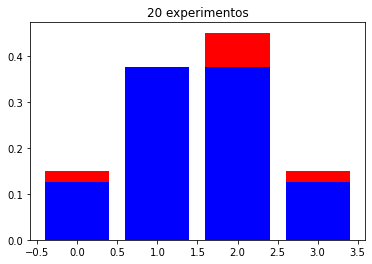

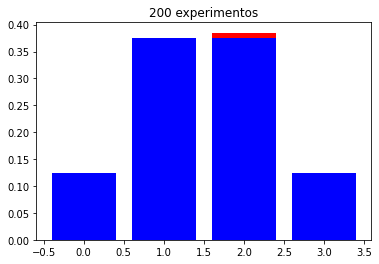

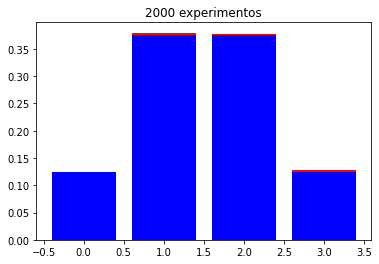

In [28]:
plot_hist(20)

plot_hist(200)
plot_hist(2000)